In [1]:
import os
import sys
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.table import Table

if str(Path.cwd().parent) not in sys.path:
    sys.path.append(str(Path.cwd().parent))

from settings.paths import match_path

%load_ext autoreload
%autoreload 2

In [2]:
spec = pd.read_csv(os.path.join(match_path, 'STRIPE82_DR4_DR16Q1a_unWISE2a_GALEXDR672a.csv'))
print(len(spec))

37978


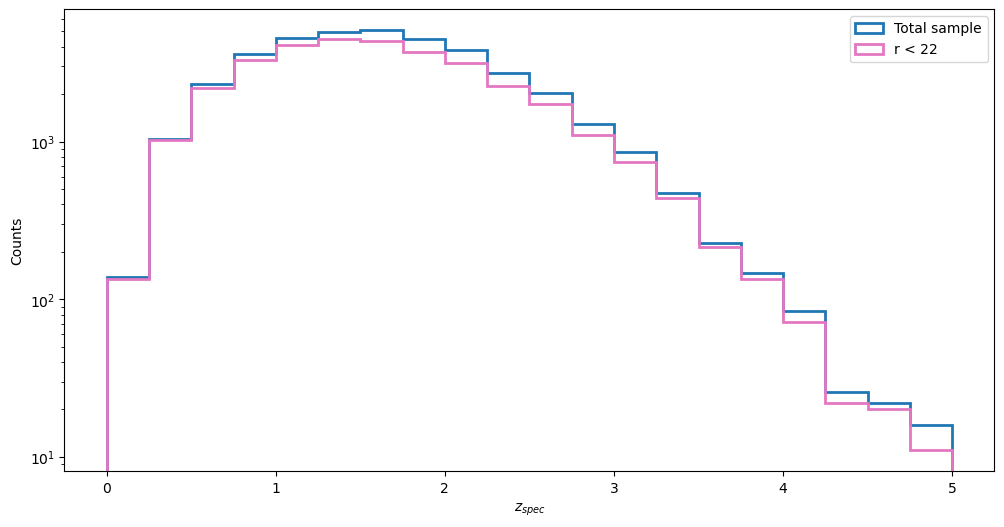

In [3]:
plt.figure(figsize=(12, 6))
bins = np.arange(0, 5.25, 0.25)
plt.hist(spec['Z'], bins=bins, label='Total sample', histtype='step', lw=2, log=True, color='tab:blue')
plt.hist(spec.query('r_PStotal < 22 | r_PStotal == 99')['Z'], bins=bins, label='r < 22', histtype='step', lw=2,
         log=True, color='tab:pink')
plt.xlabel('$z_{spec}$')
plt.ylabel('Counts')
plt.legend()
plt.show()

In [6]:
phot = pd.read_csv(os.path.join(match_path, 'STRIPE82_DR4.csv'))
print(len(phot))
phot_qsos80 = pd.read_csv(os.path.join(match_path, 'dr4_qso80.csv'))
print(len(phot_qsos80))

10973634
1152537


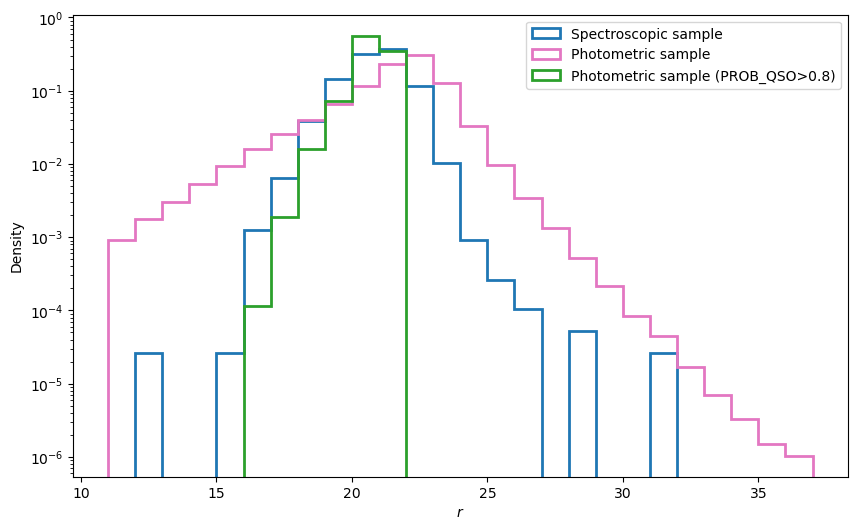

In [6]:
plt.figure(figsize=(10,6))
bins = np.arange(11, 38, 1)

plt.hist(spec.query('r_PStotal != 99')['r_PStotal'], bins=bins, label='Spectroscopic sample', histtype='step', lw=2,
         log=True, density=True, color='tab:blue')

plt.hist(phot.query('R_PStotal != 99')['R_PStotal'], bins=bins, label='Photometric sample', histtype='step', lw=2,
         log=True, density=True, color='tab:pink')

plt.hist(phot_qsos80.query('r_PStotal != 99')['r_PStotal'], bins=bins, label='Photometric sample (PROB_QSO>0.8)', histtype='step', lw=2,
         log=True, density=True, color='tab:green')

plt.xlabel('$r$')
plt.ylabel('Density')
plt.legend()
plt.show()

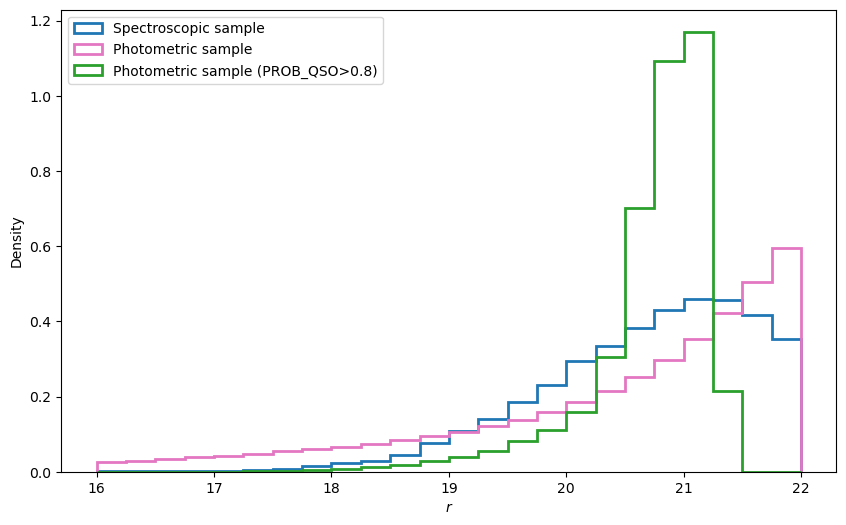

In [9]:
plt.figure(figsize=(10,6))
bins = np.arange(16, 22.25, 0.25)

log = False

plt.hist(spec.query('r_PStotal != 99')['r_PStotal'], bins=bins, label='Spectroscopic sample', histtype='step', lw=2,
         log=log, density=True, color='tab:blue')

plt.hist(phot.query('R_PStotal != 99')['R_PStotal'], bins=bins, label='Photometric sample', histtype='step', lw=2,
         log=log, density=True, color='tab:pink')

plt.hist(phot_qsos80.query('r_PStotal != 99')['r_PStotal'], bins=bins, label='Photometric sample (PROB_QSO>0.8)', histtype='step', lw=2,
         log=log, density=True, color='tab:green')

plt.xlabel('$r$')
plt.ylabel('Density')
plt.legend()
plt.show()

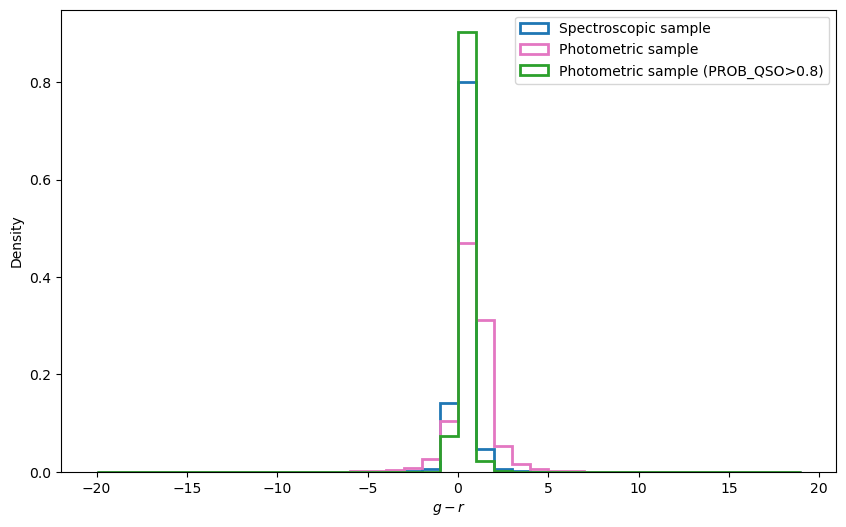

In [17]:
plt.figure(figsize=(10,6))
bins = np.arange(-20, 20, 1)

log = False
query = 'r_PStotal != 99 & g_PStotal != 99'
query2 = 'R_PStotal != 99 & G_PStotal != 99'

plt.hist(spec.query(query)['g_PStotal'] - spec.query(query)['r_PStotal'],
         bins=bins, label='Spectroscopic sample', histtype='step', lw=2, log=log, density=True, color='tab:blue')

plt.hist(phot.query(query2)['G_PStotal'] - phot.query(query2)['R_PStotal'],
         bins=bins, label='Photometric sample', histtype='step', lw=2, log=log, density=True, color='tab:pink')

plt.hist(phot_qsos80.query(query)['g_PStotal'] - phot_qsos80.query(query)['r_PStotal'],
         bins=bins, label='Photometric sample (PROB_QSO>0.8)', histtype='step', lw=2, log=log, density=True, color='tab:green')

plt.xlabel('$g - r$')
plt.ylabel('Density')
plt.legend()
plt.show()